# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: December 3, 2022
* Student Name: Katherine Sejas
* Student Net ID: sws2vn
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: https://github.com/ksejas/montecarlosimulator

# The Monte Carlo Module

In [2]:

import pandas as pd
import numpy as np

class Die:
    '''
    The Die Class creates a die with N sides or faces and assigns a weight to each face. The Die Class
    has three methods: change_weight_of_a_single_side, roll_die, and view_faces_weights.
    
    Note that what we are calling a die can represent a variety of random variables associated with 
    stochastic processes, such as using a deck of cards or flipping a coin or speaking a language. 
    The user can create these models by increasing the number of sides and defining the values of their 
    faces. Our probability models for such variables are, however, very simple, since our weights apply 
    to single events. The events are assumed to be independent.   
    
    The weight assigned to each face defaults to 1.0 when the die object is created. However, by using 
    the change_weight_of_a_single_side method the default weight assigned to any given face on the die 
    can be changed to a new weight. The die can be rolled one or more times to select a face, by using 
    the method roll_die. The user can see the die's current set of faces and weights by using the 
    view_faces_weights method.  
    '''

    def __init__(self, faces_array):
        ''' 
        The __init__ takes one argument, an array that contains the face values of a die called 
        faces_array. The faces_array may have a data type of strings or numbers. 
        The face values contained in faces_array must be unique, therefore a test in this __init__
        is included to verify that there are no duplicate face values. If there is a duplicate then 
        a message will be printed that warns the user that the faces in faces_array are not unique.
        The __init__ initializes w as equal to 1.0 for each face, 
        which represents the defualt weight of each face in faces_array. 
        '''
        unique_faces = []
        for face in faces_array:
            if face not in unique_faces:
                unique_faces.append(face)
        self.w=[1.0]
        self.faces_array=unique_faces
        w_length = [1.0]*len(self.faces_array)
        self.faces_with_weights = pd.DataFrame({
            'w' : w_length,
            'faces' : faces_array
        }).astype(dtype = {'w' : float})
        count=self.faces_with_weights.faces.unique().size
        rows_num=len(self.faces_with_weights)
        test_unique=count==rows_num
        if True==test_unique:
            pass
        else: 
            print("The faces included in the faces_array are not unique. There is at least one face value that has at least one duplicate. Therefore, faces_array has now been made as unique. The duplicate faces have been dropped from faces_array.")

    def change_weight_of_a_single_side(self, face_value, new_weight):
        '''The change_weight_of_a_single_side method takes two arguments: face_value and new_weight.
        The face_value represents the face of the die that should have its weight changed to the new 
        weight value specified by new_weight. 
        The method first checks whether the provided face_value is a face on the die object.
        When the face_value is confirmed as an included value then the new_weight value is checked 
        to see if it is a float. If the new_weight value is not a float but an integer or a number stored 
        as a string which can be converted to a float then the value is converted to a float.
        Otherwise, if the new_weight is not a number then an error message is displayed. If both checks pass
        then the new weight value is assigned to the specified face.'''
        if any(self.faces_with_weights.faces == face_value)==True:
            if isinstance(new_weight, float)==True:
                row_num=self.faces_with_weights[self.faces_with_weights['faces']==face_value].index[0] 
                self.faces_with_weights.iloc[row_num, 0]=new_weight
            elif isinstance(new_weight, int)==True:
                new_weight_float=float(new_weight)
                row_num=self.faces_with_weights[self.faces_with_weights['faces']==face_value].index[0]
                self.faces_with_weights.iloc[row_num, 0]=new_weight_float   
            elif isinstance(new_weight, str==True):
                try:
                    new_weight_float=float(new_weight) 
                    row_num=self.faces_with_weights[self.faces_with_weights['faces']==face_value].index[0]
                    self.faces_with_weights.iloc[row_num, 0]=new_weight_float   
                except:
                    print("The new_weight value is not a number stored as a string.")      
            else: 
                print("Error: The new weight is not a number.")
        else:
            print("The new face value is a face value that is not included as a face on the die object, no change made.")
        
    def roll_die(self, number_of_rolls=1):
        '''
        The roll_die method takes one argument called number_of_rolls, which represents the number
        of times the die is to be rolled. The default value assigned to the number_of_rolls is 1.
        The rolling of the die is essentially a random sample from the die faces according to the weights.
        The results of the die roll are stored in roll_list, which is returned to the user. 
        '''
        self.rolled_faces_with_weights = self.faces_with_weights.sample(n=number_of_rolls, replace = True, weights="w").reset_index(drop=True)
        self.roll_list=self.rolled_faces_with_weights['faces'].values.tolist()
        return self.roll_list

    def view_faces_weights(self):
        '''
        The view_faces_weights method returns/shows the user the die's current set of faces and weights. '''
        return self.faces_with_weights

class Game:
    '''
    The Game Class consists of rolling one or more dice of the same kind one or more times. Each die in a 
    given game has the same number of sides and set of faces, but each die object may have its own weights.
    The Game Class has two methods: play and result_of_recent_play. 

    The Game Class is initialized with a list of one or more dice. The user will specify how many times
    to roll the dice(s) as the parameter for the play method. The results of the recent play can be 
    displayed to the user by using the result_of_recent_play method. 
    
    '''

    def __init__(self, die_object_list):
        '''
        The __init__ takes one argument: the die_object_list is a list of already instantiated 
        similar Die objects. 
        '''
        self.die_object_list=die_object_list


    def play(self, number_of_rolls:int):
        '''
        The play method takes one argument called number_of_rolls, which is an integer that represents the 
        number of times the dice is to be rolled. The results of the play/rolls are saved in a wide form 
        dataframe. 
        The index of the wide form dataframe is called roll_num_index and represents the given roll number. 
        The columns in the dataframe each represent one die. Each cell for a given roll number and die stores
        the face resulting from each roll of die. 
         '''
        self.number_of_rolls=number_of_rolls
        self.result_of_play = pd.DataFrame()
        self.result_of_play.index.rename('roll_num_index', inplace=True)
        for die_num, die in enumerate(self.die_object_list):
            col_name = "dice_" + str(die_num)
            for roll_num in range(number_of_rolls):
                self.result_of_play.loc[roll_num, col_name] = die.roll_die(1)[0]

    def result_of_recent_play(self, shape_type:str):
        '''
        The result_of_recent_play method takes one argument called shape_type, which is a string that
        specifies the dataframe form. The shape_type has two valid values: wide or narrow. If the user 
        provides a different value for shape_type then an exception is raised. 
        
        The play method produces a wide form dataframe therefore this parameter defaults to wide form. 
        The narrow form dataframe has a two-column index with the roll number and the die number, and 
        a single column for the face rolled. 

        '''
        self.shape_type=shape_type
        if self.shape_type=="wide":
            return self.result_of_play
        elif self.shape_type=="narrow":
            self.result_of_play_reset_index = self.result_of_play.copy().reset_index()
            self.result_of_play_t = pd.wide_to_long(self.result_of_play_reset_index, "dice_", i="roll_num_index", j="dice_num")
            return self.result_of_play_t
        else:
            raise ValueError("User passed an invalid option for the shape type of the dataframe. A shape type of wide or narrow was not passed.")

class Analyzer:
    '''
    The Analyzer Class takes the results of a single game and computes the following statistics by using one of its 
    three methods:
        -  The face_counts_per_roll method calculates the number of times a given face is rolled in each event. 
        
        -  The jackpot method calculates the number of times a roll resulted in all faces having the same value 
           such as six twos for a six-sided dice.

        -  The combo method calculates the number of times each distinct combination of faces is rolled.

    The Analyzer Class is initialized with a game object. 
         
    '''

    def __init__(self, game_object):
        '''
        The __init__ takes one argument: the game_object. 
        The __init__ then takes the game_object and infers the data type of the die faces.
        '''
        self.game_object = game_object
        self.game_object_type = self.game_object.dtypes
 

    def face_counts_per_roll(self):
        '''
        The face_counts_per_roll method calculates the number of times a given face is rolled in each event and stores the results
        in a wide form dataframe that has an index of the roll number and face values as columns. 

        '''
        game = self.game_object
        self.faces_with_counts = game.apply(lambda faces_series: faces_series.value_counts(), axis = 1).fillna(0).rename_axis(columns = 'roll_num')
        return self.faces_with_counts

    def jackpot(self):
        '''
        The jackpot method calculates and returns the number of times a roll resulted in all faces having the same value 
        such as six twos for a six-sided dice.
        The jackpot method also stores the results in the faces_with_counts_sel dataframe which has a column called jackpot
        that identifies the observation/roll number that resulted in all faces having the same value. 
        '''
        self.faces_with_counts_sel=self.faces_with_counts.copy()
        self.column_num = len(self.faces_with_counts_sel.columns)
        self.first_row = self.faces_with_counts_sel.iloc[0:1,]
        self.number_of_dice = self.first_row.values.sum()
        self.column_names = self.faces_with_counts_sel.columns
        self.faces_with_counts_sel.loc[:, 'jackpot'] = 0
        for column in self.column_names:
            for row in range(len(self.faces_with_counts_sel)):
                if abs(self.faces_with_counts_sel.loc[row].at[column] - self.number_of_dice)<=0.01: 
                    self.faces_with_counts_sel.loc[row,"jackpot"] = 1
        self.number_of_jackpots = sum(self.faces_with_counts_sel['jackpot'])
        return self.number_of_jackpots

    def combo(self):
        '''
        The combo method calculates the number of times each distinct combination of faces is rolled.
        The results are saved in a dataframe called faces_with_counts_combos, which has the combinations identified by the
        sorted multi-columned index. 
        '''
        self.faces_with_counts_sel2=self.faces_with_counts.copy()
        self.faces_with_counts_sel2['Count'] = 1
        self.column_names_sel = list(self.faces_with_counts_sel2.columns[:-1])
        self.faces_with_counts_combos = self.faces_with_counts_sel2.groupby(self.column_names_sel)['Count'].sum().to_frame()
        self.faces_with_counts_combos.sort_values(by=self.column_names_sel)
        return self.faces_with_counts_combos


# Test Module

In [ ]:
import unittest
from montecarlo import *

import pandas as pd
import numpy as np


faces_array = np.array([1,2,3,4,5,6], dtype = int)
class DieTestSuite(unittest.TestCase):
    
    def test_change_weight_of_a_single_side(self): 
        Die1=Die(faces_array)
        Die1.change_weight_of_a_single_side(2.0, 4.0)
        test_face_value=2.0
        test_new_weight=4.0
        row_num=Die1.faces_with_weights[Die1.faces_with_weights['faces']==test_face_value].index[0]
        testvalue=Die1.faces_with_weights.iloc[row_num, 0]==test_new_weight
        message = "Test value is not true. The weight has not been updated to be the new specified weight."
        self.assertTrue(testvalue, message)

    def test_roll_die(self):
        Die1=Die(faces_array)
        Die1.roll_die(1)
        testvalue=len(Die1.roll_list)==1
        message="Test value is not true. The size of the random sample (roll_list) is not equal to the number of specified rolls."
        self.assertTrue(testvalue, message)

    def test_view_faces_weights(self): 
        Die1=Die(faces_array)
        testvalue=Die1.faces_with_weights.empty
        message="Test value is not false. The faces_with_weights dataframe that specifies the die faces with its corresponding weights is empty."
        self.assertFalse(testvalue, message)


class GameTestSuite(unittest.TestCase):

    def test_play(self):
        Die1 = Die(faces_array)
        two_fair_dice = []
        two_fair_dice.append(Die1)
        two_fair_dice.append(Die1)
        Game1 = Game(two_fair_dice)
        Game1.play(5)
        Game1.result_of_recent_play('wide')
        testvalue = len(Game1.result_of_play)==5
        message = "The number of observations/rolls in result_of_play does not match the user specified number of rolls."
        self.assertTrue(testvalue, message)

    def test_result_of_recent_play(self):
        fair_dice = Die(faces_array)
        two_fair_dice = []
        for i in range(0,2):
            two_fair_dice.append(fair_dice)
        Game1=Game(two_fair_dice)
        Game1.play(4)
        Game1.result_of_recent_play(shape_type="wide")
        Game2=Game(two_fair_dice)
        Game2.play(4)
        Game2.result_of_recent_play(shape_type="narrow")
        testvalue1 = len(Game2.result_of_play_t.columns) < len(Game1.result_of_play.columns)
        testvalue2 = len(Game2.result_of_play_t) > len(Game1.result_of_play)
        if testvalue1 == True: 
            if testvalue2 == True:
                testvalue3 = True
        else:
            testvalue3 = False
        message = "The test value is not true. The size of the dataframe dimensions when comparing the narrow with wide form do not follow the correct pattern."
        self.assertTrue(testvalue3, message)

class AnalyzerTestSuite(unittest.TestCase):

    def test_face_counts_per_roll(self):

        fair_dice = Die(faces_array)
        two_fair_dice = []
        for i in range(0,2):
            two_fair_dice.append(fair_dice)
        Game3=Game(two_fair_dice)
        Game3.play(10)
        fair_game = Analyzer(Game3.result_of_play)
        fair_game.face_counts_per_roll()
        number_of_dice = fair_game.faces_with_counts.sum(axis=1)
        unique_number_of_dice = []
        for num in number_of_dice:
            if num not in unique_number_of_dice:
                unique_number_of_dice.append(num)
        testvalue1 = len(unique_number_of_dice) == 1
        if testvalue1 == True: 
            testvalue2 = (2- sum(unique_number_of_dice)<0.01)
        else: 
            print("The number of dice per row is not equal across all the rows in the whole dataframe. The face counts per roll calculation is incorrect.")
        message = "The test value is not true. The face counts per roll calculation is incorrect."
        self.assertTrue(testvalue2, message)

    def test_jackpot(self):
        fair_dice = Die(faces_array)
        two_fair_dice = []
        for i in range(0,2):
            two_fair_dice.append(fair_dice)
        Game3=Game(two_fair_dice)
        Game3.play(100)
        fair_game = Analyzer(Game3.result_of_play)
        fair_game.face_counts_per_roll()
        fair_game.jackpot()
        jackpots_only_df = fair_game.faces_with_counts_sel.loc[fair_game.faces_with_counts_sel['jackpot']!=0].iloc[:,0:6]   
        column_names = list(jackpots_only_df.columns)
        obs_ob_num = list(jackpots_only_df.index.values)
        unique_values = []
        for row in obs_ob_num:
            for column in column_names:
                cell_value=jackpots_only_df.loc[row, column]
                if abs(cell_value-2)<0.01 or abs(cell_value-0)<0.01:
                    testvalue1 = True
                else:
                    testvalue1 = False
        message = "The test value is not true. The number of rolls per dice and observation is not equal to either the total number of rolls or zero." 
        self.assertTrue(testvalue1, message)

    def test_combo(self):
        fair_dice = Die(faces_array)
        two_fair_dice = []
        for i in range(0,2):
            two_fair_dice.append(fair_dice)
        Game3=Game(two_fair_dice)
        Game3.play(100)
        fair_game = Analyzer(Game3.result_of_play)
        fair_game.face_counts_per_roll()
        fair_game.combo()
        one_combo = fair_game.faces_with_counts_combos.iloc[0:1,] 
        faces_with_counts_sel3=fair_game.faces_with_counts_sel2.iloc[:,:-1]
        column_names = list(faces_with_counts_sel3.columns)
        merge_results = one_combo.merge(faces_with_counts_sel3, how='inner', on= column_names)
        testvalue1 = len(merge_results) == one_combo.iloc[0]['Count']
        message = "The test value is not true. The calculated count of the specified combination does not equal the number of times the specified combination occurs in the dataframe."
        self.assertTrue(testvalue1, message)        

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

test_combo (__main__.AnalyzerTestSuite) ... ok
test_face_counts_per_roll (__main__.AnalyzerTestSuite) ... ok
test_jackpot (__main__.AnalyzerTestSuite) ... ok
test_change_weight_of_a_single_side (__main__.DieTestSuite) ... ok
test_roll_die (__main__.DieTestSuite) ... ok
test_view_faces_weights (__main__.DieTestSuite) ... ok
test_play (__main__.GameTestSuite) ... ok
test_result_of_recent_play (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.238s

OK


# Scenario 1: 2-Headed Coin
1. Create one fair coin (with faces H and T) and one unfair coin. For the unfair coin, give one of the faces a weight of 5 and the others 1. 

In [5]:
import pandas as pd
import numpy as np


In [6]:
from montecarlo import *
faces_array = np.array(['H', 'T'], dtype = str)
fair_coin = Die(faces_array)
fair_coin.view_faces_weights()

,w,faces
0,1.0,H
1,1.0,T


In [7]:
unfair_coin = Die(faces_array)
unfair_coin.change_weight_of_a_single_side('H', 5)
unfair_coin.view_faces_weights()

,w,faces
0,5.0,H
1,1.0,T


2. Play a game of 1000 flips of three coins with all fair dice. 

In [8]:
three_fair_coins = []
faces_array = np.array(['H', 'T'], dtype = str)
for i in range(0,3):
    fair_coin = Die(faces_array)
    three_fair_coins.append(fair_coin)
game_with_three_fair_coins = Game(three_fair_coins)
game_with_three_fair_coins.play(1000)
game_with_three_fair_coins.result_of_recent_play('wide')


,dice_0,dice_1,dice_2
roll_num_index,,,
0,T,T,T
1,H,T,T
2,H,T,H
3,T,H,H
4,T,T,T
...,...,...,...
995,H,T,H
996,H,H,H
997,T,H,T


3. Play a game of 1000 flips with two unfair dice and one fair die. 

In [9]:
three_coins_with_two_unfair = []

three_coins_with_two_unfair.append(fair_coin)
three_coins_with_two_unfair.append(unfair_coin)
three_coins_with_two_unfair.append(unfair_coin)

game_with_three_coins = Game(three_coins_with_two_unfair)
game_with_three_coins.play(1000)
game_with_three_coins.result_of_recent_play('wide')

,dice_0,dice_1,dice_2
roll_num_index,,,
0,H,H,H
1,T,H,H
2,T,H,H
3,H,T,H
4,H,H,H
...,...,...,...
995,H,H,H
996,H,H,H
997,T,H,H


4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts. 
5. Compute relative frequency as the number of jackpots over the total number of rolls. 

Fair Game

In [10]:

fair_game = Analyzer(game_with_three_fair_coins.result_of_play)
fair_game.face_counts_per_roll()

fair_game.jackpot()
relative_freq_jackpot_fair = 100*(fair_game.number_of_jackpots/1000)
relative_freq_no_jackpot_fair = 100-relative_freq_jackpot_fair

print(relative_freq_jackpot_fair)


24.5


Unfair Game

In [11]:
unfair_game = Analyzer(game_with_three_coins.result_of_play)
unfair_game.face_counts_per_roll()

unfair_game.jackpot()
relative_freq_jackpot_unfair = 100*(unfair_game.number_of_jackpots/1000)
relative_freq_no_jackpot_unfair = 100-relative_freq_jackpot_unfair

print(relative_freq_jackpot_unfair)

35.5


6. Show your results, comparing the two relative frequencies, in a simple bar chart. 

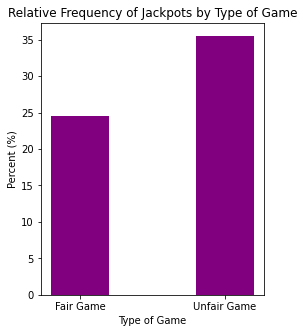

In [12]:
import matplotlib.pyplot as plt

jackpot_data_for_graph = {'Fair Game':relative_freq_jackpot_fair, 'Unfair Game':relative_freq_jackpot_unfair}
type_of_game = list(jackpot_data_for_graph.keys())
values = list(jackpot_data_for_graph.values())

fig = plt.figure(figsize = (4,5))
plt.bar(type_of_game, values, color="purple", width = 0.4)
plt.xlabel("Type of Game")
plt.ylabel("Percent (%)")
plt.title("Relative Frequency of Jackpots by Type of Game")
plt.show()

# Scenario 2: 6-sided die
7. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others. 

In [13]:
# Fair Die
faces_array = np.array([1,2,3,4,5,6], dtype = int)
fair_die = Die(faces_array)
fair_die.view_faces_weights()

,w,faces
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,1.0,6


In [14]:
# Unfair Die Type 1
unfair_die_type1 = Die(faces_array)
unfair_die_type1.change_weight_of_a_single_side(6, 5)
unfair_die_type1.view_faces_weights()

,w,faces
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,5.0,6


In [15]:
# Unfair Die Type 2
unfair_die_type2 = Die(faces_array)
unfair_die_type2.change_weight_of_a_single_side(1, 5)
unfair_die_type2.view_faces_weights()

,w,faces
0,5.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
5,1.0,6


8. Play a game of 10000 rolls with 5 fair dice. 

In [16]:
five_fair_dice = []

for i in range(0,5):
    five_fair_dice.append(fair_die)
game_with_five_fair_dice = Game(five_fair_dice)
game_with_five_fair_dice.play(10000)
game_with_five_fair_dice.result_of_recent_play('wide')

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
0,1.0,1.0,3.0,1.0,2.0
1,1.0,4.0,6.0,5.0,4.0
2,2.0,3.0,6.0,6.0,4.0
3,6.0,2.0,1.0,3.0,5.0
4,4.0,2.0,3.0,1.0,2.0
...,...,...,...,...,...
9995,4.0,6.0,4.0,1.0,6.0
9996,1.0,3.0,1.0,1.0,2.0
9997,5.0,3.0,2.0,5.0,4.0


9. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice. 

In [17]:
two_unfair_type1_one_unfair_type2_two_fair_dice = []

two_unfair_type1_one_unfair_type2_two_fair_dice.append(fair_die)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(fair_die)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type1)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type1)
two_unfair_type1_one_unfair_type2_two_fair_dice.append(unfair_die_type2)

game_with_five_dice = Game(two_unfair_type1_one_unfair_type2_two_fair_dice)
game_with_five_dice.play(10000)
game_with_five_dice.result_of_recent_play('wide')

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
0,6.0,1.0,2.0,5.0,5.0
1,5.0,3.0,6.0,5.0,1.0
2,3.0,5.0,6.0,3.0,6.0
3,4.0,3.0,6.0,2.0,1.0
4,6.0,4.0,6.0,2.0,6.0
...,...,...,...,...,...
9995,2.0,5.0,1.0,6.0,5.0
9996,2.0,3.0,6.0,6.0,1.0
9997,6.0,3.0,2.0,6.0,1.0


10. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart. 

Fair Game

In [18]:
fair_game_dice = Analyzer(game_with_five_fair_dice.result_of_play)
fair_game_dice.face_counts_per_roll()

fair_game_dice.jackpot()
relative_freq_jackpot_fair_dice = 100*(fair_game_dice.number_of_jackpots/1000)
relative_freq_no_jackpot_fair_dice = 100-relative_freq_jackpot_fair_dice

print(relative_freq_jackpot_fair_dice)

0.5


Unfair Game

In [19]:
unfair_game_dice = Analyzer(game_with_five_dice.result_of_play)
unfair_game_dice.face_counts_per_roll()

unfair_game_dice.jackpot()
relative_freq_jackpot_unfair_dice = 100*(unfair_game_dice.number_of_jackpots/1000)
relative_freq_no_jackpot_unfair_dice = 100-relative_freq_jackpot_unfair_dice

print(relative_freq_jackpot_unfair_dice)

0.6


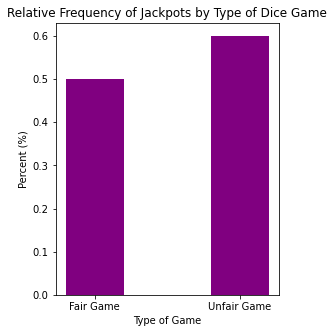

In [20]:
jackpot_dice_data_for_graph = {'Fair Game':relative_freq_jackpot_fair_dice, 'Unfair Game':relative_freq_jackpot_unfair_dice}
type_of_game_dice = list(jackpot_dice_data_for_graph.keys())
values = list(jackpot_dice_data_for_graph.values())

fig = plt.figure(figsize = (4,5))
plt.bar(type_of_game_dice, values, color="purple", width = 0.4)
plt.xlabel("Type of Game")
plt.ylabel("Percent (%)")
plt.title("Relative Frequency of Jackpots by Type of Dice Game")
plt.show()

11. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

Fair Game

In [21]:
fair_game_dice.combo()
fair_game_dice_top_10_combinations=fair_game_dice.faces_with_counts_combos.sort_values(by='Count', ascending=False).iloc[0:10,:]
fair_game_dice_top_10_combinations.reset_index(drop=False, inplace=True)
fair_game_dice_top_10_combinations

,1.0,2.0,3.0,4.0,5.0,6.0,Count
0,1.0,1.0,1.0,1.0,1.0,0.0,179
1,1.0,1.0,1.0,1.0,0.0,1.0,166
2,1.0,0.0,1.0,1.0,1.0,1.0,160
3,0.0,1.0,1.0,1.0,1.0,1.0,157
4,1.0,1.0,1.0,0.0,1.0,1.0,153
5,1.0,1.0,0.0,1.0,1.0,1.0,148
6,0.0,2.0,1.0,0.0,1.0,1.0,95
7,0.0,2.0,1.0,1.0,1.0,0.0,93
8,0.0,1.0,2.0,1.0,1.0,0.0,91
9,1.0,0.0,1.0,1.0,0.0,2.0,90


In [22]:
column_names = list(fair_game_dice_top_10_combinations.columns[0:6])
fair_game_dice_top_10_combinations.loc[:,'Combo'] = ""
for row in range(len(fair_game_dice_top_10_combinations)):
    for column in column_names:
        number_of_times_rolled = int(fair_game_dice_top_10_combinations.loc[row,column])
        fair_game_dice_top_10_combinations.loc[row,"Combo"] += str(int(column))*number_of_times_rolled
fair_game_dice_top_10_combinations

type_of_game_dice = list(fair_game_dice_top_10_combinations.loc[:,"Combo"])
values = list(fair_game_dice_top_10_combinations.loc[:,"Count"])

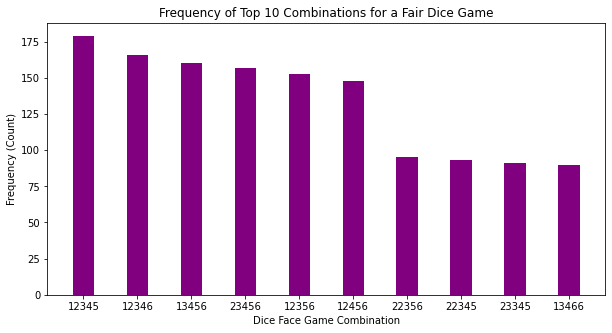

In [23]:
fig = plt.figure(figsize = (10,5))
plt.bar(type_of_game_dice, values, color="purple", width = 0.4)
plt.xlabel("Dice Face Game Combination")
plt.ylabel("Frequency (Count)")
plt.title("Frequency of Top 10 Combinations for a Fair Dice Game")
plt.show()

Unfair Game

In [24]:
unfair_game_dice.combo()
unfair_game_dice_top_10_combinations=unfair_game_dice.faces_with_counts_combos.sort_values(by='Count', ascending=False).iloc[0:10,:]
unfair_game_dice_top_10_combinations.reset_index(drop=False, inplace=True)
unfair_game_dice_top_10_combinations

,1.0,2.0,3.0,4.0,5.0,6.0,Count
0,1.0,1.0,0.0,0.0,1.0,2.0,222
1,1.0,1.0,1.0,0.0,0.0,2.0,202
2,1.0,0.0,1.0,1.0,0.0,2.0,201
3,1.0,0.0,1.0,0.0,1.0,2.0,198
4,1.0,0.0,0.0,1.0,1.0,2.0,196
5,1.0,1.0,0.0,1.0,0.0,2.0,188
6,1.0,0.0,1.0,1.0,1.0,1.0,180
7,2.0,0.0,0.0,0.0,1.0,2.0,176
8,1.0,1.0,1.0,0.0,1.0,1.0,174
9,2.0,0.0,0.0,1.0,0.0,2.0,168


In [25]:
column_names_unfair = list(unfair_game_dice_top_10_combinations.columns[0:6])
unfair_game_dice_top_10_combinations.loc[:,'Combo'] = ""
for row in range(len(unfair_game_dice_top_10_combinations)):
    for column in column_names_unfair:
        number_of_times_rolled = int(unfair_game_dice_top_10_combinations.loc[row,column])
        unfair_game_dice_top_10_combinations.loc[row,"Combo"] += str(int(column))*number_of_times_rolled
unfair_game_dice_top_10_combinations

type_of_game_unfair_dice = list(unfair_game_dice_top_10_combinations.loc[:,"Combo"])
values_unfair = list(unfair_game_dice_top_10_combinations.loc[:,"Count"])

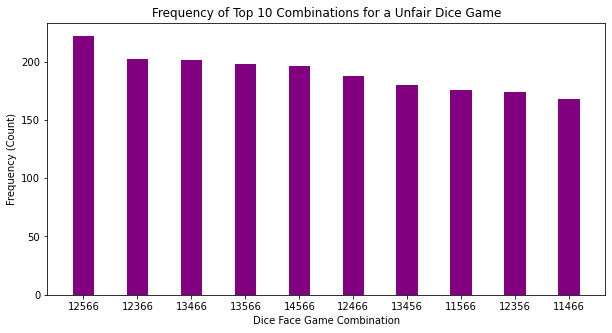

In [26]:
fig = plt.figure(figsize = (10,5))
plt.bar(type_of_game_unfair_dice, values_unfair, color="purple", width = 0.4)
plt.xlabel("Dice Face Game Combination")
plt.ylabel("Frequency (Count)")
plt.title("Frequency of Top 10 Combinations for a Unfair Dice Game")
plt.show()

# Scenario 3: Roman Alphabet
12. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights. 

Read in Frequency of Letters File

In [27]:
import pandas as pd
letter_with_weights = pd.read_csv('Frequency of Letters - Freq.csv')
letter_with_weights

,letter,weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


Create Die before Changing the Weights

In [28]:
letters_array = pd.Series(letter_with_weights['letter'].values)
dice_of_letters = Die(letters_array)
dice_of_letters.view_faces_weights()

,w,faces
0,1.0,A
1,1.0,B
2,1.0,C
3,1.0,D
4,1.0,E
5,1.0,F
6,1.0,G
7,1.0,H
8,1.0,I
9,1.0,J


Change Weights of Die

In [29]:
obs=len(letter_with_weights)
for num in range(obs):
    face_value=letter_with_weights.loc[num].at['letter']
    new_weight_value=letter_with_weights.loc[num].at['weight']
    dice_of_letters.change_weight_of_a_single_side(face_value, new_weight_value)
dice_of_letters.view_faces_weights()

,w,faces
0,8.4966,A
1,2.0720,B
2,4.5388,C
3,3.3844,D
4,11.1607,E
5,1.8121,F
6,2.4705,G
7,3.0034,H
8,7.5448,I
9,0.1965,J


13. Play a game involving 5 of these dice with 1000 rolls.

In [30]:
five_letter_dice = []

for i in range(0,5):
    five_letter_dice.append(dice_of_letters)
game_with_five_letter_dice = Game(five_letter_dice)
game_with_five_letter_dice.play(10000)
game_with_five_letter_dice.result_of_recent_play('wide')

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
0,K,R,E,A,X
1,T,H,A,R,I
2,E,T,E,M,G
3,S,B,M,D,P
4,R,M,D,M,E
...,...,...,...,...,...
9995,E,O,C,P,R
9996,H,U,L,D,Y
9997,I,N,T,S,A


14. Generate 10 random samples of 10 from your data and count the number of times you see a word that looks like an English word in each sample. Keep a running count; this will result in an estimate of the percent of English words in the data. 

Based on the samples listed below there were _ number of English words in the data. Therefore, the percent of English words in the data is __ percent. 

In [31]:
import pandas as pd
for samp_num in range(10):
    globals()["sample_"+str(samp_num)]=game_with_five_letter_dice.result_of_play.sample(n=10)

None of my samples had a five letter word that was spelled correctly. Therefore the percent equals 0%. 
Sample 0 - has 0 words ; running count = 0
Sample 1 - has 0 words ; running count = 0
Sample 2 - has 0 words ; running count = 0
Sample 3 - has 0 words ; running count = 0
Sample 4 - has 0 words ; running count = 0
Sample 5 - has 0 words ; running count = 0
Sample 6 - has 0 words ; running count = 0 (has the latin word sanor)
Sample 7 - has 0 words ; running count = 0
Sample 8 - has 0 words ; running count = 0
Sample 9 - has 0 words ; running count = 0

There were words of shorter lengths or approximately mispelled words that looked like another English word. A few examples are: "Too" in sample 1, "Rat" in sample 1, "But" in sample 2, "no" in sample 9. 

In [32]:
sample_0

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
5567,T,L,B,E,B
4232,T,O,L,M,E
7113,T,R,A,S,C
4709,A,I,C,M,A
509,R,I,E,O,A
9204,D,A,R,L,O
1054,R,R,A,A,H
3770,O,U,S,C,H
2176,V,L,E,R,R


In [33]:
sample_1

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
5011,U,C,H,R,M
9075,T,O,O,U,A
2324,R,A,T,U,N
6018,I,E,N,T,R
5359,E,E,E,E,S
3943,A,D,S,E,M
706,C,C,R,E,L
2120,I,N,U,O,U
3546,U,T,Y,D,E


In [34]:
sample_2

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
2151,E,I,N,I,N
4543,E,B,U,T,R
7852,A,A,C,A,C
8775,O,A,N,T,N
3590,T,S,I,E,R
7204,B,L,A,P,T
793,L,C,S,L,T
9694,T,R,P,C,L
433,E,S,R,E,R


In [35]:
sample_3

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
8639,R,F,F,N,A
873,M,W,S,T,U
2918,N,E,S,D,T
2896,I,O,D,O,H
936,L,I,I,N,L
4241,U,I,P,B,T
8885,Q,E,L,T,R
9777,G,K,O,S,D
1325,B,T,I,D,I


In [36]:
sample_4

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
5560,B,A,S,A,O
1031,R,R,L,U,T
9053,O,U,C,H,A
832,L,M,W,R,E
8278,T,A,R,H,T
4327,A,I,C,R,O
2621,O,O,S,M,M
7204,B,L,A,P,T
8831,T,E,D,E,M


In [37]:
sample_5

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
5489,I,E,R,A,I
1583,O,E,A,E,E
9572,E,O,A,A,T
3643,I,E,R,T,A
8480,R,O,E,I,T
4261,O,N,T,S,W
7748,E,O,T,O,U
3112,K,L,R,R,L
3967,E,S,I,A,S


In [38]:
sample_6

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
5428,I,H,S,E,O
2679,S,I,R,U,D
9152,U,E,E,S,E
7537,R,I,L,N,L
5044,I,O,E,N,N
9593,N,E,D,O,I
3379,F,E,R,Y,A
4564,S,A,N,O,R
9646,A,Y,U,U,O


In [39]:
sample_7

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
2515,L,C,R,R,R
4834,E,R,E,L,K
2314,R,I,O,I,N
1031,R,R,L,U,T
8503,O,S,E,H,N
1981,L,I,E,A,N
136,T,H,S,L,O
1300,M,T,E,C,M
9699,U,O,S,D,N


In [40]:
sample_8

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
4570,D,S,S,O,S
3347,R,A,O,I,T
8994,O,N,D,E,B
7672,M,A,L,H,L
5863,Y,N,K,A,R
979,R,I,A,N,L
6295,C,E,O,R,T
1771,E,I,O,O,A
6728,I,E,M,S,R


In [41]:
sample_9

,dice_0,dice_1,dice_2,dice_3,dice_4
roll_num_index,,,,,
6989,A,S,E,O,O
662,A,E,F,C,O
2055,K,O,E,D,D
4201,V,R,F,M,I
8183,T,L,C,D,I
7920,E,R,S,M,W
5268,U,E,M,R,H
3312,E,H,N,O,O
9020,E,D,O,E,R


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [6]:
!ls -lRF -o

.:
total 224
-rw-r--r-- 1 sws2vn    273 Dec  6 20:47 Frequency of Letters - Freq.csv
drwxr-sr-x 3 sws2vn   1536 Dec  6 21:20 montecarlo/
-rw-r--r-- 1 sws2vn 192292 Dec  6 21:15 montecarlo_demo.ipynb
-rw-r--r-- 1 sws2vn     38 Dec  6 21:20 montecarlo_demo.py
-rw-r--r-- 1 sws2vn    524 Dec  6 20:47 montecarlo_test_results.txt
-rw-r--r-- 1 sws2vn   5926 Dec  6 20:47 montecarlo_tests.py
-rw-r--r-- 1 sws2vn    728 Dec  6 20:47 setup.py

./montecarlo:
total 24
-rw-r--r-- 1 sws2vn    74 Dec  6 20:48 __init__.py
-rw-r--r-- 1 sws2vn 12172 Dec  6 20:48 montecarlo.py
drwxr-sr-x 2 sws2vn  1024 Dec  6 21:20 __pycache__/

./montecarlo/__pycache__:
total 20
-rw-r--r-- 1 sws2vn   251 Dec  6 21:20 __init__.cpython-38.pyc
-rw-r--r-- 1 sws2vn 11729 Dec  6 21:20 montecarlo.cpython-38.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [5]:
!python /sfs/qumulo/qhome/sws2vn/Project/montecarlosimulator/montecarlo_demo.py

Welcome to my module called montecarlo.
